# Homework 1 - Introduction

In [103]:
import pandas as pd
import numpy as np

### Q1. Pandas version

In [104]:
pd.__version__

'2.3.1'

### Getting the data

In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [106]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Q2. Records count 
How many records are in the dataset?


In [107]:
df.shape # (number of rows, number of columns)

(9704, 11)

In [108]:
len(df) # number of rows

9704

### Q3. Fuel types
How many fuel types are presented in the dataset?

In [109]:
df['fuel_type'].nunique()

2

### Q4. Missing values
How many columns in the dataset have missing values?

In [110]:
# returns a series
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [111]:
# filter only columns with missing values
null_series = df.isnull().sum()
null_series[null_series > 0]

num_cylinders    482
horsepower       708
acceleration     930
num_doors        502
dtype: int64

In [112]:
# count of columns with missing values
null_series[null_series > 0].shape[0]

4

### Q5. Max fuel efficiency
What's the maximum fuel efficiency of cars from Asia?

In [113]:
df[df['origin']=='Asia']['fuel_efficiency_mpg'].max()

np.float64(23.759122836520497)

### Q6. Median value of horsepower
1. Find the median value of horsepower column in the dataset.
2. Next, calculate the most frequent value of the same horsepower column.
3. Use fillna method to fill the missing values in horsepower column with the most frequent value from the previous step.
4. Now, calculate the median value of horsepower once again.

In [114]:
df['horsepower'].median()

np.float64(149.0)

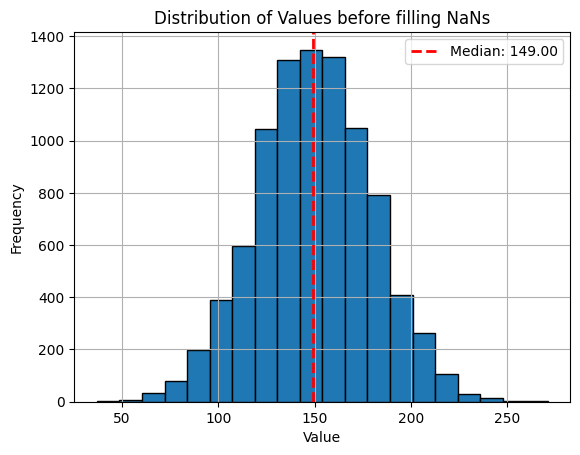

In [145]:
import matplotlib.pyplot as plt

median_value = df['horsepower'].median()

df['horsepower'].hist(bins=20, edgecolor='black')

# Add titles and labels for clarity
plt.title('Distribution of Values before filling NaNs')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [146]:
# use mode() to find the most frequent value of a numeric column
df['horsepower'].mode()

0    152.0
Name: horsepower, dtype: float64

In [147]:
# number of missing values in 'horsepower' column
df['horsepower'].isnull().sum()

np.int64(708)

In [148]:
# fill missing values with most fequent value
df['horsepower'] = df['horsepower'].fillna(152)

In [149]:
df['horsepower'].median()

np.float64(152.0)

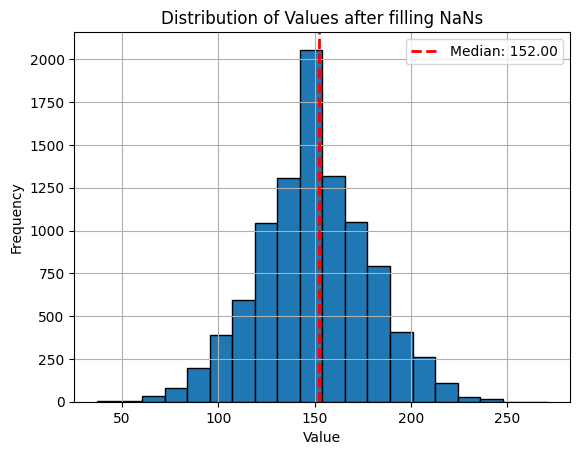

In [150]:
df['horsepower'].hist(bins=20, edgecolor='black')
median_value = df['horsepower'].median()

plt.title('Distribution of Values after filling NaNs')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [151]:
df['horsepower'].describe()

count    9704.000000
mean      149.828215
std        28.775248
min        37.000000
25%       131.000000
50%       152.000000
75%       168.000000
max       271.000000
Name: horsepower, dtype: float64

### Q7. Sum of weights
1. Select all the cars from Asia 
2. Select only columns vehicle_weight and model_year 
3. Select the first 7 values 
4. Get the underlying NumPy array. Let's call it X.
5. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
6. Invert XTX.
7. Create an array y with values [1100, 1300, 800, 900, 1000, 1100, 1200].
8. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
9. What's the sum of all the elements of the result?

In [56]:
df_asia = df[df['origin']=='Asia']
df_asia.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
12,320,5.0,145.0,2783.868974,15.1,2010,Asia,Diesel,All-wheel drive,1.0,16.175820
14,200,6.0,160.0,3582.687368,14.9,2007,Asia,Diesel,All-wheel drive,0.0,11.871091
20,150,3.0,197.0,2231.808142,18.7,2011,Asia,Gasoline,Front-wheel drive,1.0,18.889083
21,160,4.0,133.0,2659.431451,NaN,2016,Asia,Gasoline,Front-wheel drive,-1.0,16.077730


In [60]:
df_asia_subset = df_asia[['vehicle_weight', 'model_year']]
df_asia_subset.head()

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016


In [62]:
df_asia_subset_7 = df_asia_subset.iloc[:7]
df_asia_subset_7

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


In [68]:
X = df_asia_subset_7.to_numpy() #values is considered legacy
X

array([[2714.21930965, 2016.        ],
       [2783.86897424, 2010.        ],
       [3582.68736772, 2007.        ],
       [2231.8081416 , 2011.        ],
       [2659.43145076, 2016.        ],
       [2844.22753389, 2014.        ],
       [3761.99403819, 2019.        ]])

In [94]:
X.shape

(7, 2)

In [70]:
# tranpose of X
X.T

array([[2714.21930965, 2783.86897424, 3582.68736772, 2231.8081416 ,
        2659.43145076, 2844.22753389, 3761.99403819],
       [2016.        , 2010.        , 2007.        , 2011.        ,
        2016.        , 2014.        , 2019.        ]])

In [95]:
X.T.shape

(2, 7)

In [93]:
XTX = X.T.dot(X)

In [96]:
XTX.shape

(2, 2)

In [98]:
# Inverse of XTX
inv_XTX = np.linalg.inv(XTX)
inv_XTX

array([[ 5.71497081e-07, -8.34509443e-07],
       [-8.34509443e-07,  1.25380877e-06]])

In [97]:
inv_X.shape

(7, 7)

In [89]:
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])

In [101]:
w = inv_XTX.dot(X.T).dot(y)
w

array([0.01386421, 0.5049067 ])

In [102]:
result = w.sum()
result

np.float64(0.5187709081074016)